# Advanced plotting
Vaex uses matplotlib for plotting, which allows great flexibility. However, to avoid repetative code, vaex tries to cover many cases where you want to plot more than one panel using a simple declarative style.

In [1]:
import vaex as vx
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
ds = vx.example()

## Single plot

The simplest case is a single plot. The first two argument can be any valid math Python expression.

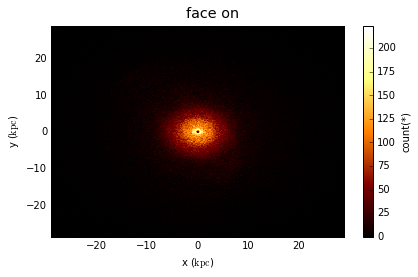

In [3]:
ds.plot("x", "y", title="face on");

## Multiple plots of the same type
If the first argument instead is a list, containing a list of expression of length 2, they correspond to different plots.

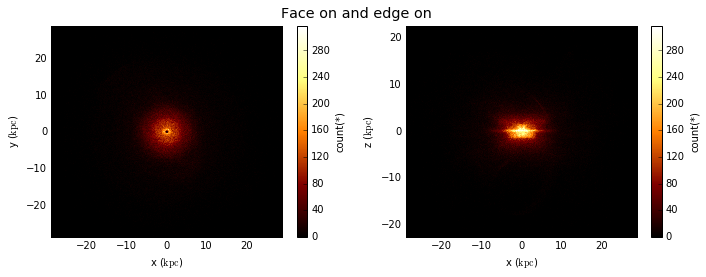

In [4]:
ds.plot([["x", "y"], ["x", "z"]], title="Face on and edge on", figsize=(10,4));

## Multiple plots, same axes, different statistic
If the what argument is a list, it will (by default) form the columns of subplots.

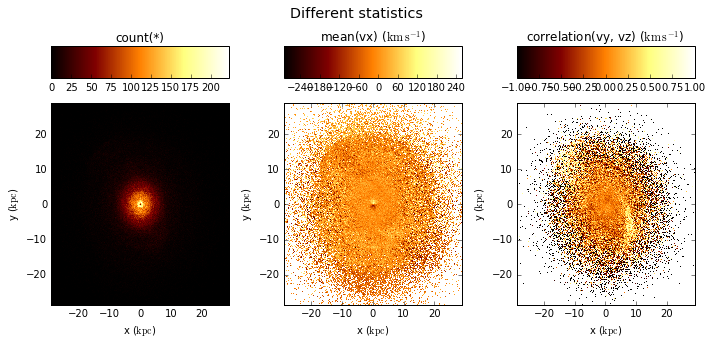

In [5]:
ds.plot("x", "y", what=["count(*)", "mean(vx)", "correlation(vy, vz)"], title="Different statistics", figsize=(10,5));

## Multiple plots, different axes and different statistic
If multiple subspaces are given as a first argument, as well as multiple what arguments, the subspaces will form the rows, and the 'whats' will form the columns.

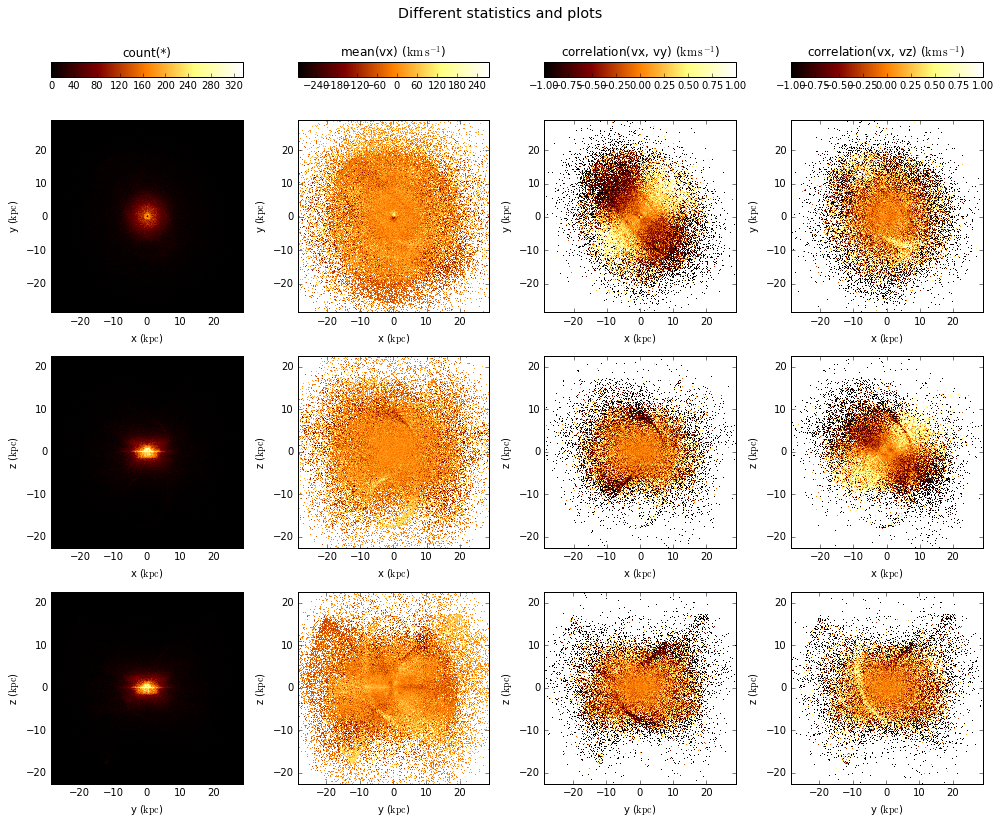

In [6]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]],
        what=["count(*)", "mean(vx)", "correlation(vx, vy)", "correlation(vx, vz)"],
        title="Different statistics and plots", figsize=(14,12));

Specify what goes as row and column using the visual argument, here we swap the row and column ordering.

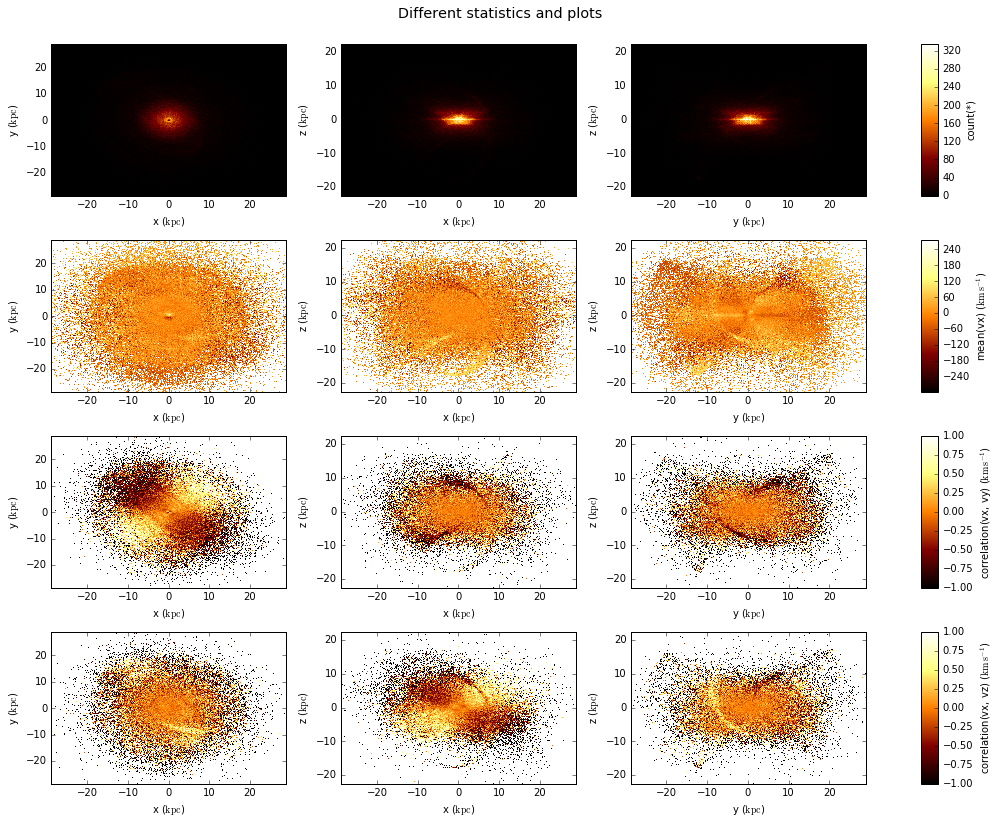

In [7]:
ds.plot([["x", "y"], ["x", "z"], ["y", "z"]],
        what=["count(*)", "mean(vx)", "correlation(vx, vy)", "correlation(vx, vz)"],
        visual=dict(row="what", column="subspace"),
        title="Different statistics and plots", figsize=(14,12));

## Slices in a 3rd dimension
If a 3rd axis (z) is given, you can 'slice' through the data, displaying the z slices as rows. Note that here the rows are wrapped, which can be changed using the `wrap_columns` argument.

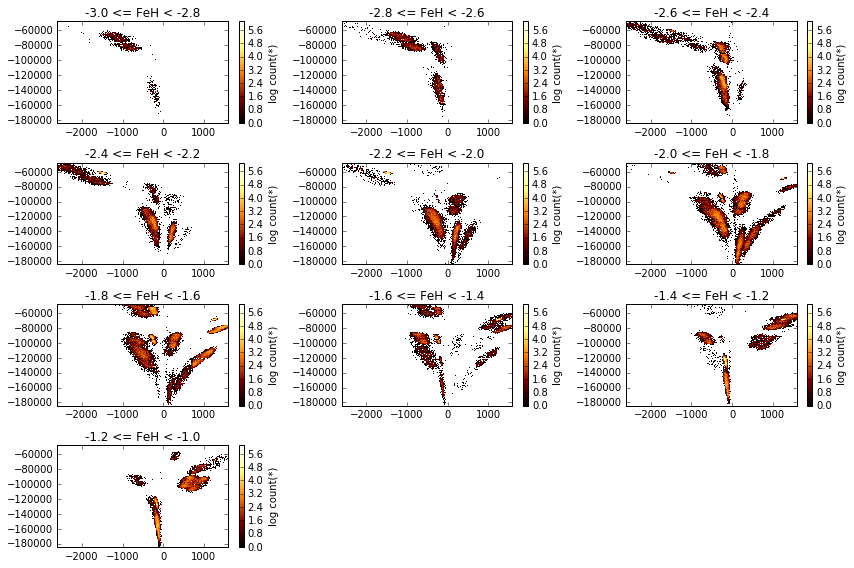

In [8]:
ds.plot("Lz", "E", z="FeH:-3,-1,10", show=True, visual=dict(row="z"), figsize=(12,8), f="log", wrap_columns=3);

## Many plots with wrapping
Also if many plots are plotted, they are nicely wrapped. Here we plot them sorted my mutual information.

In [9]:
allpairs = ds.combinations(exclude=["random_index"])
mi, pairs = ds.mutual_information(allpairs, sort=True)

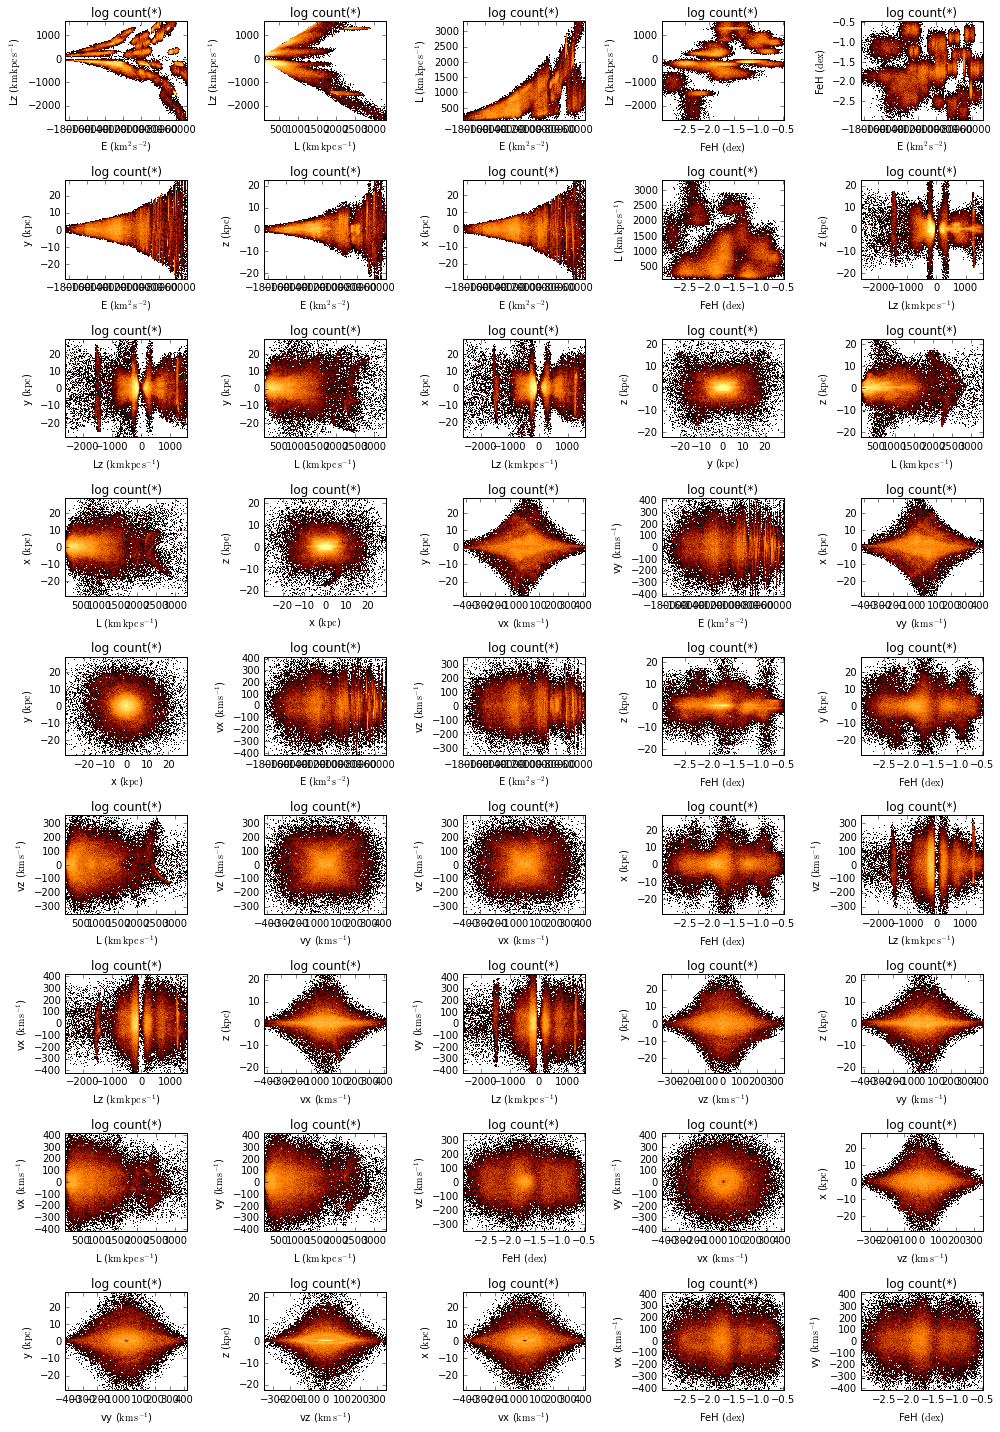

In [10]:
ds.plot(pairs, f="log", figsize=(14,20), colorbar=False, wrap_columns=5)

## Using selections

If a selection is used, then onlt the selection is plotted.

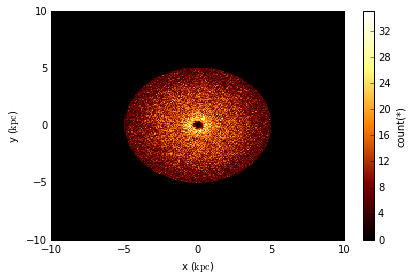

In [11]:
ds.plot("x", "y", selection="sqrt(x**2+y**2) < 5", limits=[-10, 10]);

If multiple selections are given (where False or None indicates no selection), every selection by default forms a 'layer', which are then blended together.

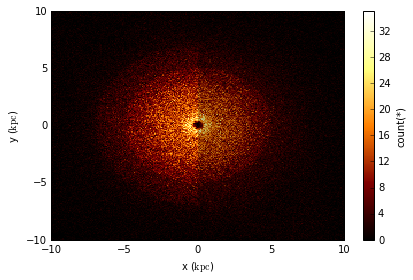

In [12]:
ds.plot("x", "y", selection=[False, "sqrt(x**2+y**2) < 5", "(sqrt(x**2+y**2) < 7) & (x < 0)"], limits=[-10, 10]);

However, by specifying that the selection should be mapped to a column, we can show a different selection in each row.

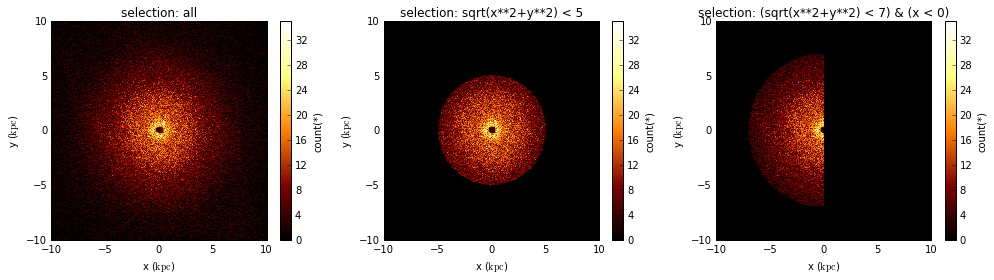

In [13]:
ds.plot("x", "y", selection=[False, "sqrt(x**2+y**2) < 5", "(sqrt(x**2+y**2) < 7) & (x < 0)"], limits=[-10, 10],
       visual=dict(column="selection"), figsize=(14,4));

# Smaller datasets / scatter plot
Although vaex focusses on large datasets, sometimes you end up with a fraction of the data (due to a selection) and you want to make a scatter plot. You could try the following approach:

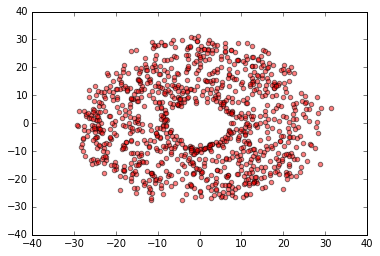

In [14]:
x = ds.evaluate("x", selection="Lz < -2500")
y = ds.evaluate("y", selection="Lz < -2500")
plt.scatter(x, y, c="red", alpha=0.5);

But for convenience we provide a wrapper to avoid repetitive code:

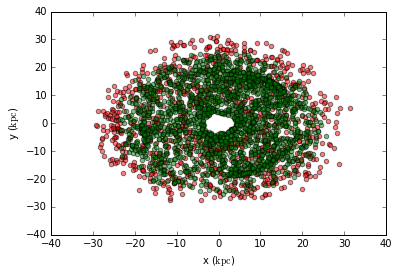

In [15]:
ds.scatter("x", "y", selection="Lz < -2500", c="red", alpha=0.5)
ds.scatter("x", "y", selection="Lz > 1500", c="green", alpha=0.5);

Extra arguments are an expression for the size and the color.

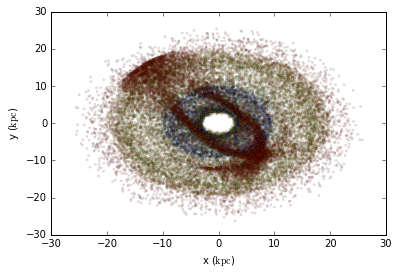

In [16]:
ds.scatter("x", "y", s_expr="FeH+5", c_expr="E", selection="Lz > 1000", alpha=0.1)

Note that both style's of plotting can perfectly be mixed, as we are using matplotlib

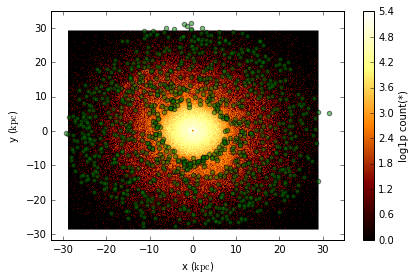

In [17]:

ds.plot("x", "y", f="log1p")
ds.scatter("x", "y", selection="Lz < -2500", c="green", alpha=0.5);

Vaex also supports dict style array access `ds['x']` will return all the numpy array for the x column. This in combination with [Dataset.to_copy](api.html#vaex.dataset.Dataset.to_copy) allows you to use matplotlib in this style:

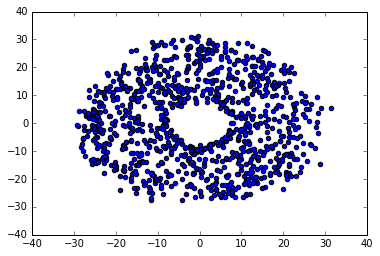

In [18]:
subset = ds.to_copy(selection="Lz < -2500")
plt.scatter("x", "y", data=subset)